In [29]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
import os
import h5py
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import roc_auc_score
from  pathlib import Path

In [30]:
import data as Data
import models

#### ETL inicial

In [31]:
path_train = os.listdir('64x64_SIGNS/train_signs/')

In [32]:
label_train = [int(i[0]) for i in path_train]

In [6]:
pd.Series(label_train).value_counts()

5    149
1    146
4    144
2    142
3    142
0    141
dtype: int64

<BarContainer object of 6 artists>

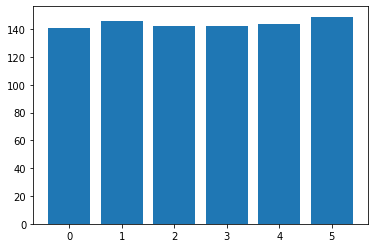

In [41]:
plt.bar(pd.Series(label_train).value_counts().index,pd.Series(label_train).value_counts())

Datos balanceados, construyamos los metadatos de train, test  y validation para construir el generador de datos usando Dataset API de Tf

In [7]:
path_test = os.listdir('64x64_SIGNS/test_signs/')
path_val = os.listdir('64x64_SIGNS/val_signs/')

In [8]:
label_test = [int(i[0]) for i in path_test]
label_val = [int(i[0]) for i in path_val]

In [9]:
split_train = ['train']*len(path_train)
split_test = ['test']*len(path_test)
split_val = ['val']*len(path_val)

In [10]:
metadata = pd.DataFrame()
metadata['names'] = path_train + path_test + path_val
metadata['label'] = label_train + label_test+ label_val
metadata['split'] = split_train + split_test + split_val

In [11]:
metadata = metadata.sample(frac=1).reset_index(drop=True)

In [12]:
metadata

,names,label,split
0,0_IMG_6275 (1).jpg,0,train
1,2_IMG_4757.jpg,2,test
2,3_IMG_6005.jpg,3,train
3,4_IMG_5424.jpg,4,train
4,1_IMG_4400.jpg,1,val
...,...,...,...
1195,2_IMG_4699.jpg,2,test
1196,4_IMG_5338.jpg,4,val
1197,2_IMG_4777.jpg,2,val
1198,2_IMG_4618.jpg,2,train


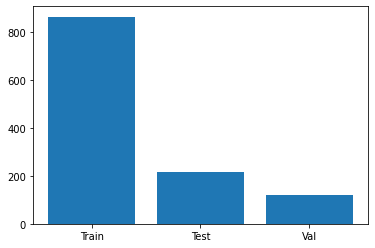

In [13]:
plt.bar(['Train','Test','Val'],metadata['split'].value_counts()[0:3]);


In [14]:
train_sources = Data.build_sources_from_metadata(metadata, '64x64_SIGNS/train_signs/')
test_sources = Data.build_sources_from_metadata(metadata, '64x64_SIGNS/test_signs/',mode='test')
val_sources = Data.build_sources_from_metadata(metadata, '64x64_SIGNS/val_signs/',mode='val')

Generamos un dataset y un batch para verificar que el pipeline este correcto. El aumento de datos ha sido incluido en el pipeline usando la libreria Albumentations.

In [50]:
dataset = Data.make_dataset(train_sources, training=True,batch_size=6, num_epochs=20,num_parallel_calls=1,pixels=64)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


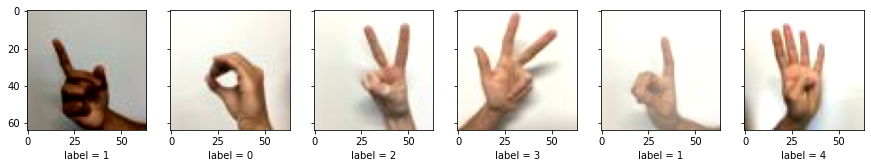

In [51]:
dataset = iter(dataset)
Data.imshow_batch_(next(dataset),cant=6)

#### Experimentare con arquitecturas tipo AlexNet con un modulo que he implementado que permite crear arquitecturas en Keras desde arrays

In [53]:
CNN=models.build_standard_cnn([32,32,0,64,64,0,128,0],[1000,0,1000,0],(64,64,3),6)

In [16]:
batch_size=16
epochs=10
lr=0.001

In [57]:
CNN.compile(loss=tf.losses.SparseCategoricalCrossentropy(),
            optimizer=tf.optimizers.Adam(lr),
            metrics=['accuracy'])

Se usa el Dataset API de TensorFlow para crear los datasets y manejar de manera eficiente la memoria.

In [19]:
train_dataset = Data.make_dataset(train_sources, training=True,
    batch_size=batch_size, num_epochs=epochs,
    num_parallel_calls=5,pixels=64)

test_dataset = Data.make_dataset(test_sources, training=False,
    batch_size=batch_size, num_epochs=epochs,
    num_parallel_calls=5,pixels=64)

val_dataset = Data.make_dataset(val_sources, training=False,
    batch_size=batch_size, num_epochs=1,
    num_parallel_calls=5,pixels=64)


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `

In [59]:
h=CNN.fit(x=train_dataset, epochs=epochs,validation_data=test_dataset)

Epoch 1/10
540/540 [==============================] - 96s 177ms/step - loss: 0.8508 - accuracy: 0.6736 - val_loss: 0.4712 - val_accuracy: 0.8500
Epoch 2/10
540/540 [==============================] - 96s 178ms/step - loss: 0.1525 - accuracy: 0.9503 - val_loss: 0.6937 - val_accuracy: 0.8833
Epoch 3/10
540/540 [==============================] - 96s 179ms/step - loss: 0.0883 - accuracy: 0.9738 - val_loss: 0.5561 - val_accuracy: 0.8833
Epoch 4/10
540/540 [==============================] - 98s 181ms/step - loss: 0.0615 - accuracy: 0.9819 - val_loss: 0.5644 - val_accuracy: 0.8917
Epoch 5/10
540/540 [==============================] - 111s 205ms/step - loss: 0.0398 - accuracy: 0.9878 - val_loss: 0.5730 - val_accuracy: 0.9000
Epoch 6/10
540/540 [==============================] - 105s 194ms/step - loss: 0.0371 - accuracy: 0.9899 - val_loss: 0.7666 - val_accuracy: 0.8917
Epoch 7/10
540/540 [==============================] - 100s 185ms/step - loss: 0.0644 - accuracy: 0.9829 - val_loss: 0.7371 - val

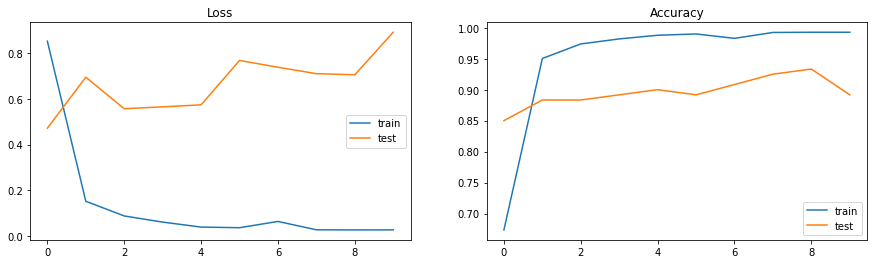

In [60]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.plot(h.history['loss'],label='train')
plt.plot(h.history['val_loss'],label='test')
plt.title('Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(h.history['accuracy'],label='train')
plt.plot(h.history['val_accuracy'],label='test')
plt.title('Accuracy')
plt.legend()

Existe una varianza significativa que podriamos atacar con una regularizacion mas agresiva pero usaremos este modelo para el ejercicio

In [62]:
CNN.save('Models/hand_numbers')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: Models/hand_numbers\assets


In [18]:
CNN2 = tf.keras.models.load_model('Models/hand_numbers')

In [21]:
y_preds=CNN2.predict(val_dataset)
preds = np.argmax(y_preds, axis=-1)

In [25]:
y_true=metadata['label'][metadata['split']=='val']
y_true=np.array(y_true)

Normalized confusion matrix
[[1.         0.         0.         0.         0.         0.        ]
 [0.05882353 0.88235294 0.05882353 0.         0.         0.        ]
 [0.02631579 0.18421053 0.76315789 0.         0.         0.02631579]
 [0.02631579 0.02631579 0.02631579 0.89473684 0.02631579 0.        ]
 [0.02777778 0.         0.05555556 0.         0.80555556 0.11111111]
 [0.         0.         0.         0.         0.         1.        ]]


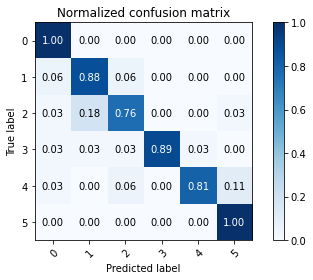

In [27]:
Data.plot_confusion_matrix(y_true,preds,classes=['0','1','2','3','4','5'],normalize=True);

La clase numero 2 es el mas afectado al ser confundido con la clase 1 en su gran parte. Se aconseja recolectar mas datos de diferntes distribuciones y hacer uso de estrategia que ayuden al balance del perfomance entre clases. Puede ser aumento de datos por clase, funcion de coste ponderada haciendo uso del parametro class_weights, entre otros.

In [28]:
print(classification_report(y_true,preds))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        39
           1       0.79      0.88      0.83        34
           2       0.85      0.76      0.81        38
           3       1.00      0.89      0.94        38
           4       0.97      0.81      0.88        36
           5       0.86      1.00      0.93        31

    accuracy                           0.89       216
   macro avg       0.89      0.89      0.89       216
weighted avg       0.89      0.89      0.89       216



Tenemos un valor de 89% para precision, sensibilidad y f1-score. Teniendo en cuenta que son 6 clases es un valor decente sin embargo al ser los datos de una distribucion tan especifica esta metrica no representa el error del clasificador en todos los escenarios posibles.